In [1]:
import helper
import os
import glob
import cv2
import random
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


%load_ext autoreload
%autoreload 2

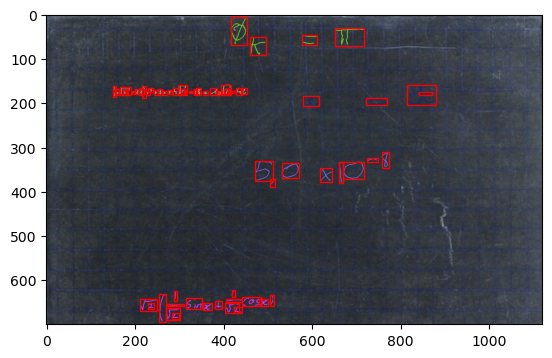

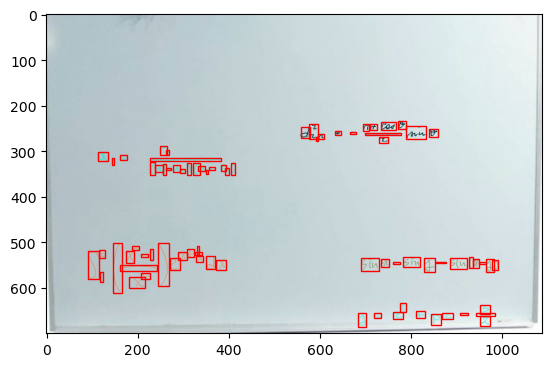

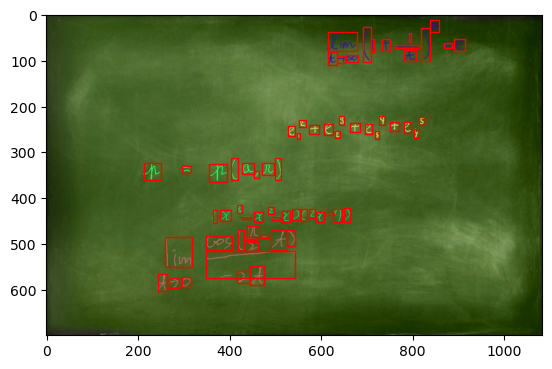

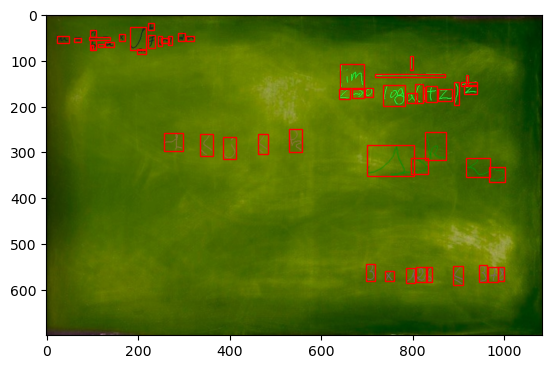

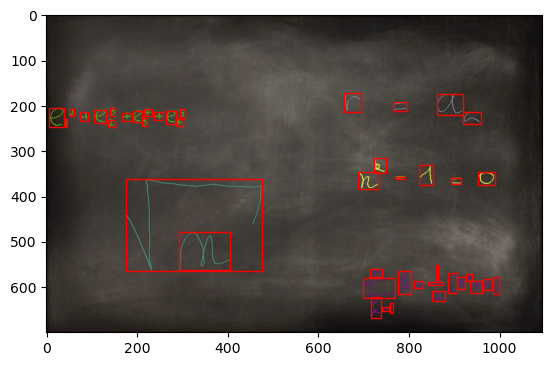

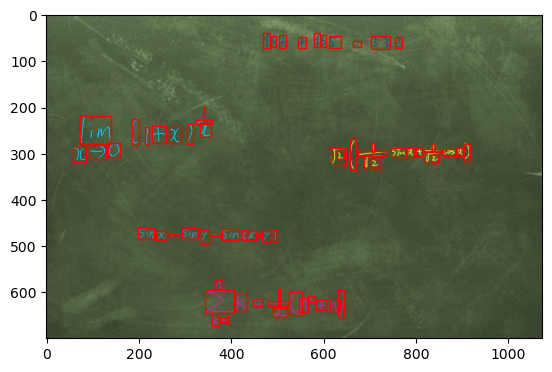

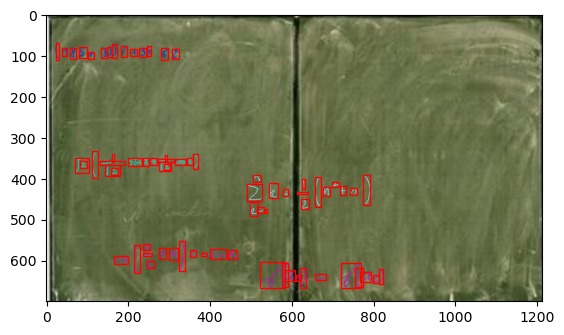

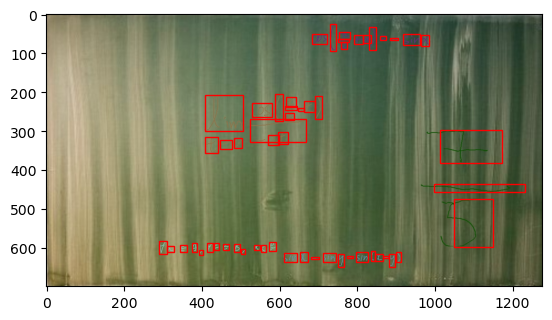

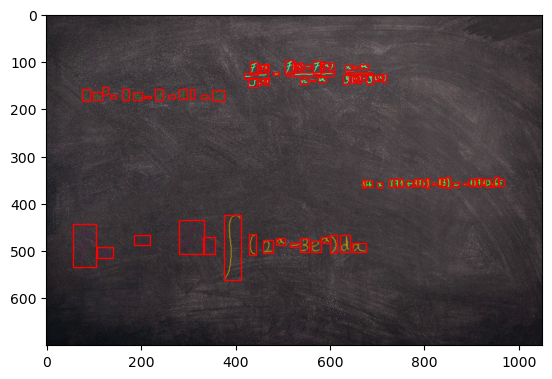

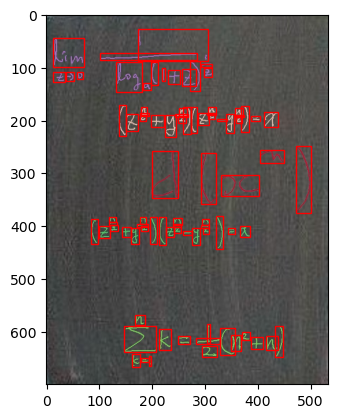

In [8]:
path = "archive\\dataset10\\"
file = open(path + "label.txt", 'r')
for i in range(10):
    back = cv2.imread(path + str(i) + ".jpg")
    bboxes = file.readline().split('.jpg ')[1].split(' ')
    for i, bbox in enumerate(bboxes):
        if '\n' in bbox:
            continue
        co = bbox.split(',')
        x1 = int(co[0])
        y1 = int(co[1])
        x2 = int(co[2])
        if co[3][-2:-1] == '\n':
            y2 = int(co[3][:-1])
        else:
            y2 = int(co[3])
        plt.gca().add_patch(Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none'))

    plt.imshow(back)
    plt.show()
file.close()


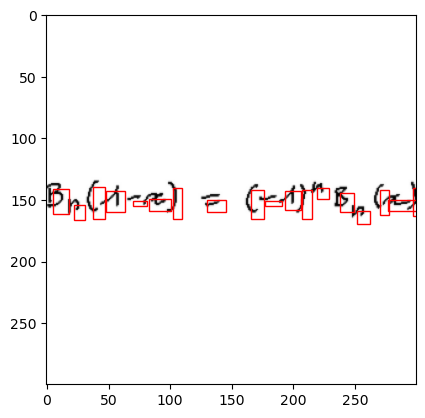

In [45]:
path = "archive\\formulas\\"
back = cv2.imread(path + "001-equation001.png")
bboxes = open(path + "/label.txt", 'r').readline().split('.png ')[1].split(' ')
for i, bbox in enumerate(bboxes):
    if '\n' in bbox:
        bbox = bbox[:-1]
    co = bbox.split(',')
    x1 = int(co[0]) + 5
    y1 = int(co[1]) + 5
    x2 = int(co[2]) + 5
    if co[3][-2:-1] == '\n':
        y2 = int(co[3][:-1]) +5
    else:
        y2 = int(co[3]) +5
    plt.gca().add_patch(Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none'))

plt.imshow(back)
plt.show()

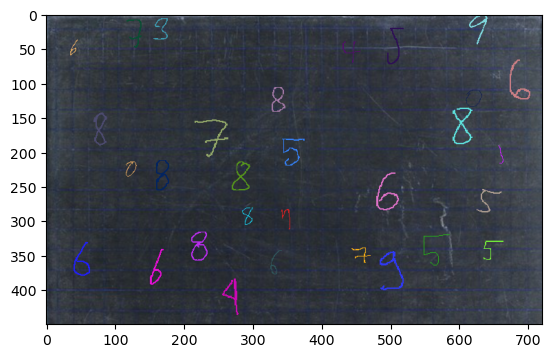

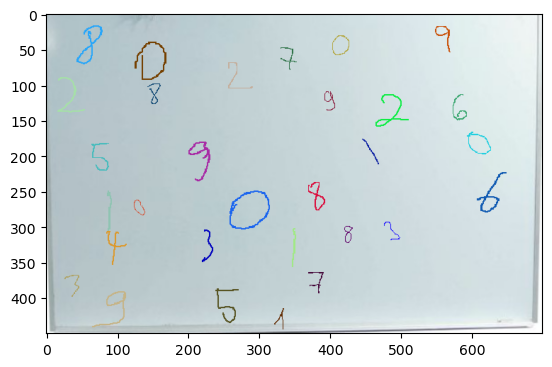

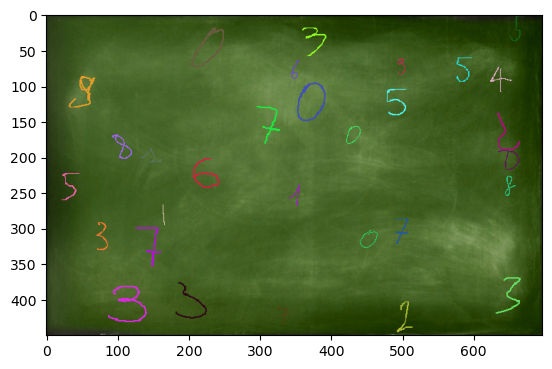

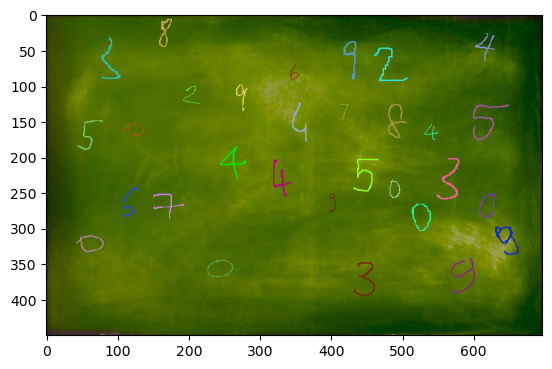

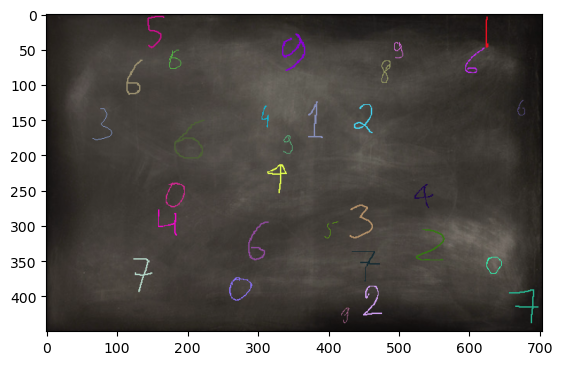

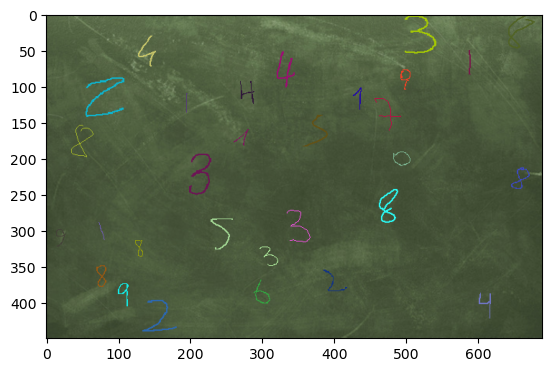

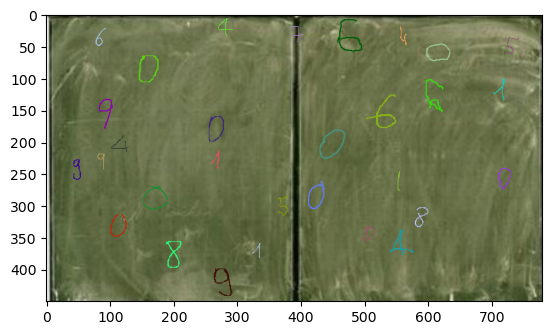

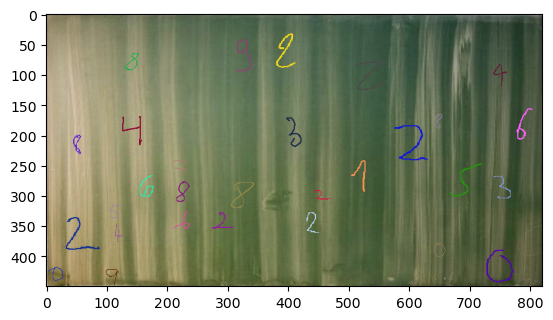

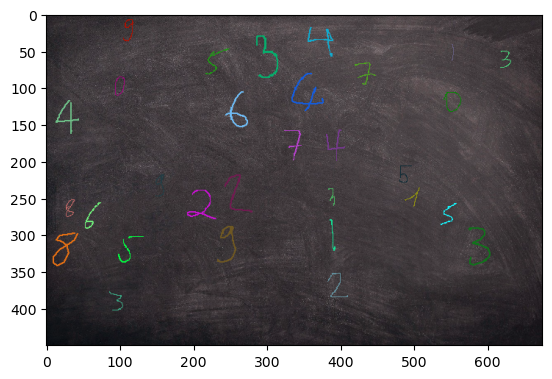

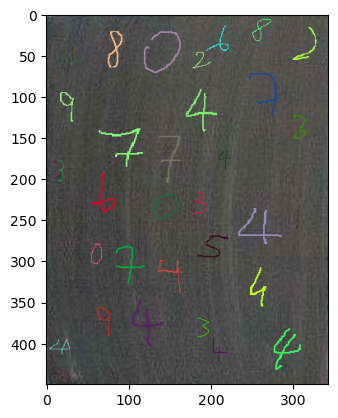

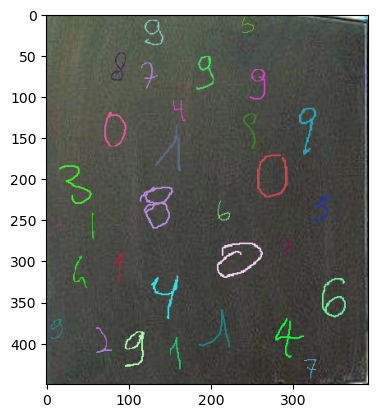

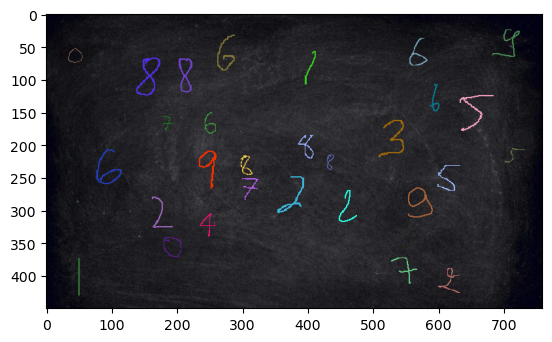

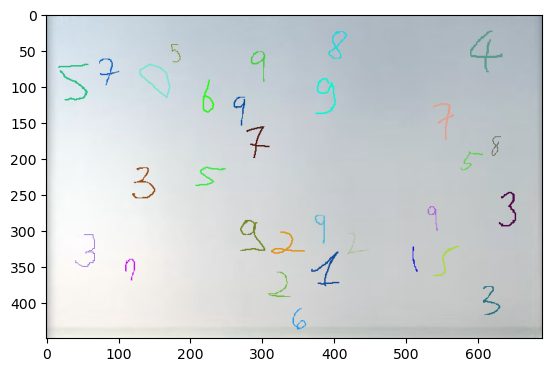

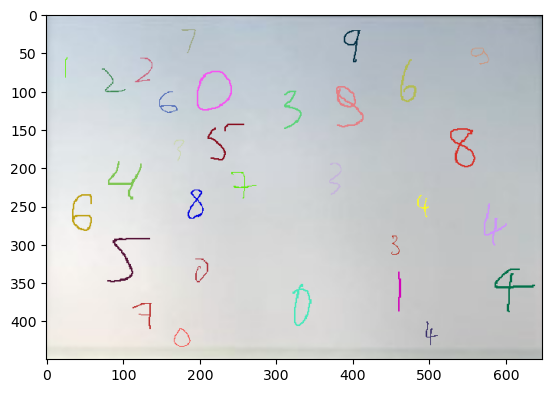

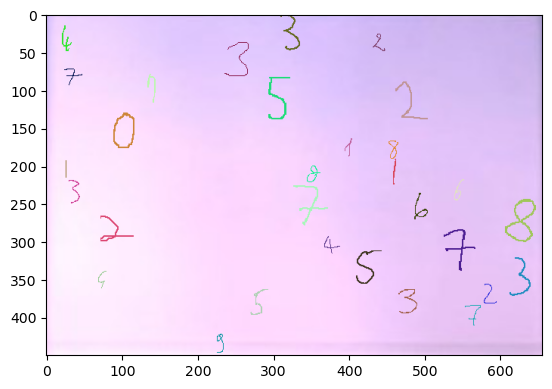

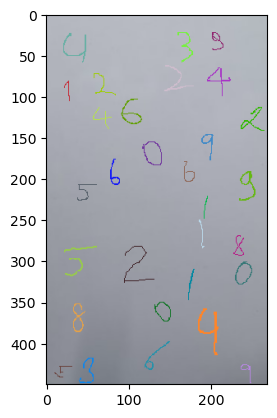

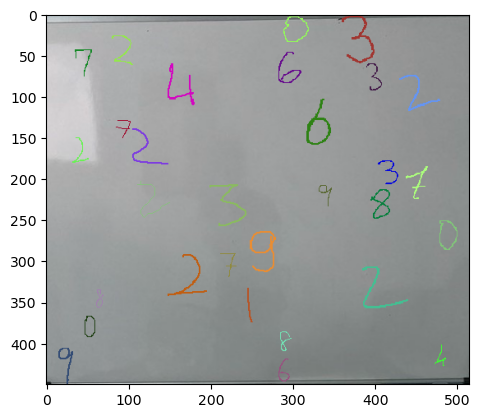

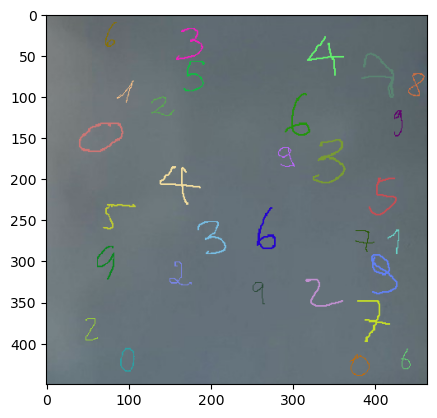

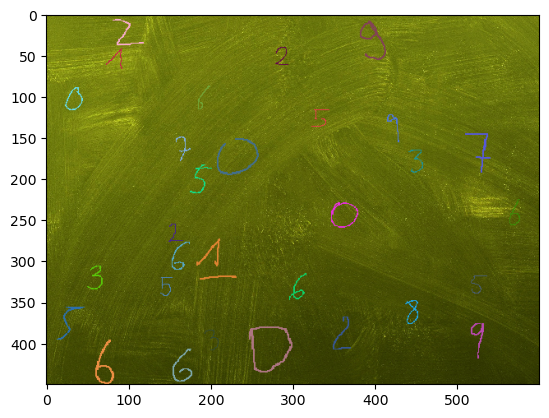

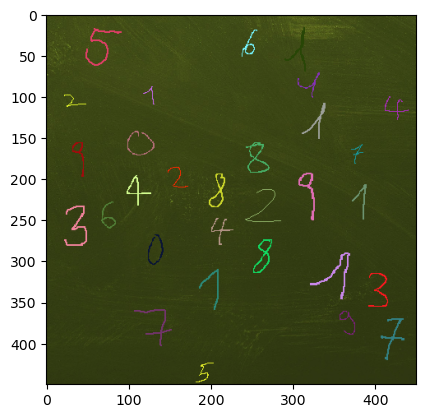

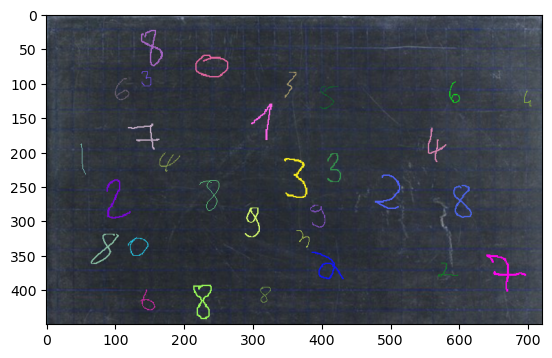

In [4]:
dataset_path = "archive\\dataset20\\"
if not os.path.exists(dataset_path):
    os.mkdir(dataset_path)

images_path = "archive\\extracted_images\\"
background_path = "archive\\background_images\\*"
labels = os.listdir(images_path)
backgrounds = [cv2.imread(file) for file in glob.glob(background_path)]
images = {}
for i, j, k in os.walk(os.getcwd()):
    if images_path in i:
        images[i[-1]] = list(map(lambda x:i + '\\' + x, k))    

filename = 0
label_txt = open(dataset_path + "label.txt", 'a')

while len(os.listdir(dataset_path))-1 <= 20:
    for back in backgrounds:
        coordinates = torch.zeros((30, 4))
        label_txt.write(os.getcwd() + '\\' + dataset_path + str(filename) + ".jpg ")
        background = back
        for i in range(30):
            label_int = random.randint(0, len(labels)-1)
            label = labels[label_int]

            img_int = random.randint(0, len(images[label])-1)
            image = cv2.imread(images[label][img_int])

            background, label_line = helper.place_image_on_background(label, image, background, coordinates, i)
            
            label_txt.write(label_line)
        
        label_txt.write('\n')
        plt.imshow(background)
        plt.show()

        cv2.imwrite(dataset_path + str(filename) + ".jpg", background)
        filename += 1
        if len(os.listdir(dataset_path))-1 >= 20:
            break

label_txt.close()


